In [7]:
import pandas as pd
%matplotlib inline

## Loading data

Simple stuff. We're loading in a CSV here, and we'll run the describe function over it to get the lay of the land.

In [8]:
df = pd.read_csv('data/ontime_reports_may_2015_ny.csv')

In [45]:
df.describe()

,YEAR,MONTH,DAY_OF_MONTH,FL_NUM,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 20
count,45648,45648,45648.000000,45648.000000,44920.000000,44703.000000,45648.000000,45648.000000,44703.000000,44703.000000,45648.000000,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000,0
mean,2015,5,15.945759,1696.717885,10.901158,2.456099,0.016912,0.003790,167.442856,139.886853,1019.913819,18.123631,3.029157,25.238350,0.061879,26.114464,NaN
std,0,0,8.893316,1422.585661,43.352321,46.814900,0.128943,0.061446,88.119647,85.685890,710.691183,51.011949,20.737081,48.335216,1.564925,50.348603,NaN
min,2015,5,1.000000,1.000000,-28.000000,-69.000000,0.000000,0.000000,43.000000,25.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2015,5,8.000000,507.000000,-5.000000,-19.000000,0.000000,0.000000,104.000000,77.000000,502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2015,5,16.000000,1289.000000,-2.000000,-9.000000,0.000000,0.000000,149.000000,122.000000,828.000000,0.000000,0.000000,6.000000,0.000000,0.000000,NaN
75%,2015,5,24.000000,2404.000000,6.000000,5.000000,0.000000,0.000000,199.000000,168.000000,1183.000000,17.000000,0.000000,28.000000,0.000000,31.000000,NaN
max,2015,5,31.000000,6520.000000,1324.000000,1318.000000,1.000000,1.000000,702.000000,648.000000,4983.000000,1318.000000,732.000000,676.000000,85.000000,846.000000,NaN


In journalism, we're primarily concerned with using data analysis for two purposes:
  
  - Finding needles in haystacks
  - And describing trends

We'll spend a little time looking at the first before we move on to the second.

## Needles in haystacks

Let's start with the longest delays:

In [5]:
df.sort('ARR_DELAY', ascending=False).head(1)

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
3680,2015,5,16,AA,1380,STT,JFK,1324,1318,0,NaN,0,261,230,1318,0,0,0,0,NaN


One record isn't super useful, so we'll do 10:

In [47]:
df.sort('ARR_DELAY', ascending=False).head(10)

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,...,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 20
3680,2015,5,16,AA,1380,STT,JFK,1324,1318,0,...,0,261,230,1623,1318,0,0,0,0,NaN
3734,2015,5,14,AA,1596,SJU,JFK,1218,1212,0,...,0,232,216,1598,1212,0,0,0,0,NaN
3593,2015,5,16,AA,1357,SJU,JFK,1028,1012,0,...,0,248,214,1598,1012,0,0,0,0,NaN
20602,2015,5,12,DL,1697,LGA,ATL,971,971,0,...,0,158,107,762,971,0,0,0,0,NaN
1947,2015,5,31,AA,938,JFK,SJU,893,899,0,...,0,245,193,1598,47,0,6,0,846,NaN
2306,2015,5,31,AA,1029,LGA,MIA,880,873,0,...,0,190,155,1096,634,0,0,0,239,NaN
4252,2015,5,31,AA,2351,JFK,MIA,836,865,0,...,0,228,159,1089,806,0,29,0,30,NaN
29393,2015,5,25,MQ,3157,ATL,LGA,860,847,0,...,0,124,98,762,0,732,0,0,115,NaN
30331,2015,5,27,MQ,3287,ORF,LGA,823,824,0,...,0,92,62,296,780,0,1,0,43,NaN
20358,2015,5,18,DL,1580,LGA,DTW,810,798,0,...,0,113,86,502,798,0,0,0,0,NaN


If we want, we can keep drilling down. Maybe we should also limit our inquiry to, say, La Guardia.

In [48]:
la_guardia_flights = df[df['ORIGIN'] == 'LGA']
la_guardia_flights.sort('ARR_DELAY', ascending=False).head(10)

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,...,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 20
20602,2015,5,12,DL,1697,LGA,ATL,971,971,0,...,0,158,107,762,971,0,0,0,0,NaN
2306,2015,5,31,AA,1029,LGA,MIA,880,873,0,...,0,190,155,1096,634,0,0,0,239,NaN
20358,2015,5,18,DL,1580,LGA,DTW,810,798,0,...,0,113,86,502,798,0,0,0,0,NaN
25230,2015,5,31,DL,884,LGA,DEN,719,676,0,...,0,231,210,1620,0,0,676,0,0,NaN
20071,2015,5,18,DL,347,LGA,ATL,556,548,0,...,0,150,109,762,113,0,0,0,435,NaN
35100,2015,5,18,UA,741,LGA,ORD,468,460,0,...,0,158,113,733,0,66,0,0,394,NaN
35070,2015,5,18,UA,1744,LGA,IAH,452,453,0,...,0,248,190,1416,158,0,1,0,294,NaN
2559,2015,5,20,AA,1131,LGA,DFW,425,439,0,...,0,266,201,1389,0,0,14,0,425,NaN
45596,2015,5,31,WN,3741,LGA,DEN,438,434,0,...,0,271,231,1620,0,434,0,0,0,NaN
34126,2015,5,27,UA,1062,LGA,ORD,431,416,0,...,0,150,109,733,0,27,0,0,389,NaN


Huh, does LGA struggle more than usual to get its planes to Atlanta on time? Let's live dangerously and make a boxplot.

(Spoiler alert: JFK is marginally worse)

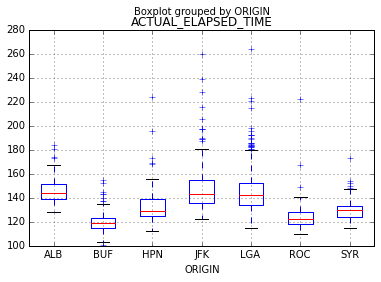

In [19]:
lga_to_atl = df[df['DEST'] == 'ATL']
lga_to_atl.boxplot('ACTUAL_ELAPSED_TIME', by='ORIGIN')

And so on.

Of course data journalists are also in the business of finding trends, so let's do some of that.

## Describing trends

Being good, accountability-minded reporters, one thing we might be interested in is each airline's on-time performance throughout our sample. Here's one way to check that:

In [49]:
df.groupby('CARRIER').median()['ARR_DELAY']

CARRIER
AA   -10.0
B6   -12.0
DL   -10.0
EV    -7.0
F9    -4.5
HA     1.0
MQ    -8.0
NK    -2.0
OO    -6.0
UA    -8.0
US    -6.0
VX    -4.0
WN    -8.0
Name: ARR_DELAY, dtype: float64

Huh. Looks like the median flight from most of these carriers tends to show up pretty early. How does that change when we look at the mean?

In [9]:
df.groupby('CARRIER').mean()['ARR_DELAY']

CARRIER
AA     2.919510
B6    -1.316943
DL     2.603535
EV     2.884379
F9    10.338889
HA     1.611111
MQ     4.021745
NK    10.204000
OO    -4.236364
UA     7.906920
US     3.912959
VX     6.497619
WN     1.975348
Name: ARR_DELAY, dtype: float64

A little less generous. We can spend some time debating which portrayal is more fair, but the large difference between the two is still worth noting.

We can, of course, also drill down by destination:

In [51]:
df.groupby(['CARRIER', 'ORIGIN']).median()['ARR_DELAY']

CARRIER  ORIGIN
AA       AUS       -5.0
         BOS      -12.0
         CLT       -1.0
         DCA       -2.0
         DFW       -4.0
         JFK       -9.0
         LAS      -14.0
         LAX      -13.0
         LGA      -14.0
         MCO       -7.0
         MIA       -5.0
         ORD       -9.0
         PHX        2.5
         SAN      -20.0
         SEA      -10.0
         SFO       -9.0
         SJU      -15.0
         STT      -19.0
B6       ABQ      -10.5
         ACK       -8.0
         AUS       -7.5
         BOS       -9.0
         BQN      -15.0
         BTV      -17.0
         BUF      -15.0
         BUR       -8.5
         CHS      -15.0
         CLT      -18.5
         DEN       -8.0
         FLL      -12.0
                   ... 
US       ROC       -9.0
         SYR       -7.5
VX       DAL       12.0
         JFK      -12.0
         LAS        2.0
         LAX       -4.0
         LGA      -15.0
         SFO       -4.0
WN       ALB      -13.0
         ATL       -9.0


And if we want a more user-friendly display ...

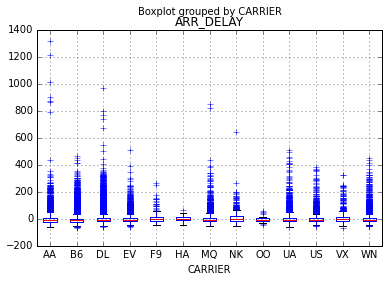

In [57]:
df.boxplot('ARR_DELAY', by='CARRIER')

## BONUS! Correlation

Up until now, we've spent a lot of time seeing how variables act in isolation -- mainly focusing on arrival delays. But sometimes we might also want to see how two variables interact. That's where correlation comes into play.

For example, let's test one of my personal suspicions that longer flights (measured in distance) tend to experience longer delays.

In [53]:
df.corr()

,YEAR,MONTH,DAY_OF_MONTH,FL_NUM,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 20
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,1.000000,-0.007699,0.096697,0.104742,0.075478,0.019298,0.018143,0.010769,0.004337,-0.012343,0.097133,0.176597,-0.010989,0.067353,NaN
FL_NUM,NaN,NaN,-0.007699,1.000000,-0.010442,0.018313,0.066249,-0.000882,-0.422188,-0.427148,-0.427198,0.019391,-0.015603,-0.062121,-0.013336,0.019450,NaN
DEP_DELAY,NaN,NaN,0.096697,-0.010442,1.000000,0.945356,0.024350,0.039431,0.017203,0.002656,-0.001030,0.530374,0.204236,0.300172,-0.006269,0.534286,NaN
ARR_DELAY,NaN,NaN,0.104742,0.018313,0.945356,1.000000,NaN,NaN,0.029697,-0.014512,-0.036939,0.508489,0.219410,0.424661,-0.011483,0.499341,NaN
CANCELLED,NaN,NaN,0.075478,0.066249,0.024350,NaN,1.000000,-0.008090,NaN,NaN,-0.063870,NaN,NaN,NaN,NaN,NaN,NaN
DIVERTED,NaN,NaN,0.019298,-0.000882,0.039431,NaN,-0.008090,1.000000,NaN,NaN,0.012781,NaN,NaN,NaN,NaN,NaN,NaN
ACTUAL_ELAPSED_TIME,NaN,NaN,0.018143,-0.422188,0.017203,0.029697,NaN,NaN,1.000000,0.988926,0.974239,-0.014475,0.045637,0.125762,0.008049,-0.091805,NaN
AIR_TIME,NaN,NaN,0.010769,-0.427148,0.002656,-0.014512,NaN,NaN,0.988926,1.000000,0.989684,0.010273,0.037006,0.063855,0.010000,-0.076887,NaN


And now we'll make a crude visualization, just to show off:

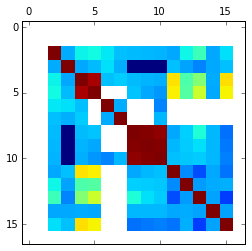

In [56]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())